In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import json
import numpy as np
import os

In [2]:
class ILAgent(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(ILAgent, self).__init__()
        self.fc1 = nn.Linear(state_dim, 512)
        self.fc2 = nn.Linear(512, 1024)
        self.fc3 = nn.Linear(1024, 2048)
        self.fc4 = nn.Linear(2048, action_dim)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        action = self.fc4(x)
        return action

In [3]:
total_states = np.load("E:\\SEM1\\CS5446\\project\\matches\\total_states_308543.npy")
total_actions = np.load("E:\\SEM1\\CS5446\\project\\matches\\total_actions_308543.npy")
total_states.shape, total_actions.shape

((14208, 427), (14208, 8, 210))

In [4]:
class MatchDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [5]:
new_actions = total_actions.reshape((-1, 1680))
matches_dataset = MatchDataset(total_states, new_actions)
batch_size = 100
dataloader = DataLoader(matches_dataset, batch_size=batch_size, shuffle=True)

In [6]:
model = ILAgent(state_dim=427, action_dim=1680)

In [7]:
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(10.0))
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
num_epochs = 200
model.to(device)
criterion.to(device)
loss_history = []
accuracy_history = []
features = torch.tensor(total_states, dtype=torch.float32).to(device)
labels = torch.tensor(new_actions, dtype=torch.float32).to(device)
for epoch in range(num_epochs):
    for batch_features, batch_labels in dataloader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        predictions = model(batch_features)
        loss = criterion(predictions, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    predictions = model(features)
    loss = criterion(predictions, labels)
    loss_history.append(loss.item())
    binary_predictions = (predictions >= 0).float()
    correct = (binary_predictions == labels).float().sum()
    accuracy = correct / labels.numel()
    accuracy_history.append(accuracy.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}")

Epoch [1/200], Loss: 0.0351, Accuracy: 0.9949
Epoch [2/200], Loss: 0.0274, Accuracy: 0.9955
Epoch [3/200], Loss: 0.0224, Accuracy: 0.9969
Epoch [4/200], Loss: 0.0205, Accuracy: 0.9968
Epoch [5/200], Loss: 0.0188, Accuracy: 0.9966
Epoch [6/200], Loss: 0.0167, Accuracy: 0.9972
Epoch [7/200], Loss: 0.0160, Accuracy: 0.9972
Epoch [8/200], Loss: 0.0145, Accuracy: 0.9975
Epoch [9/200], Loss: 0.0137, Accuracy: 0.9973
Epoch [10/200], Loss: 0.0126, Accuracy: 0.9976
Epoch [11/200], Loss: 0.0119, Accuracy: 0.9976
Epoch [12/200], Loss: 0.0114, Accuracy: 0.9980
Epoch [13/200], Loss: 0.0110, Accuracy: 0.9979
Epoch [14/200], Loss: 0.0108, Accuracy: 0.9978
Epoch [15/200], Loss: 0.0099, Accuracy: 0.9980
Epoch [16/200], Loss: 0.0095, Accuracy: 0.9983
Epoch [17/200], Loss: 0.0097, Accuracy: 0.9982
Epoch [18/200], Loss: 0.0089, Accuracy: 0.9984
Epoch [19/200], Loss: 0.0081, Accuracy: 0.9985
Epoch [20/200], Loss: 0.0085, Accuracy: 0.9983
Epoch [21/200], Loss: 0.0077, Accuracy: 0.9985
Epoch [22/200], Loss: 

In [9]:
num_epochs = 200
model.to(device)
criterion.to(device)
loss_history = []
accuracy_history = []
features = torch.tensor(total_states, dtype=torch.float32).to(device)
labels = torch.tensor(new_actions, dtype=torch.float32).to(device)
for epoch in range(num_epochs):
    for batch_features, batch_labels in dataloader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        predictions = model(batch_features)
        loss = criterion(predictions, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    predictions = model(features)
    loss = criterion(predictions, labels)
    loss_history.append(loss.item())
    binary_predictions = (predictions >= 0).float()
    correct = (binary_predictions == labels).float().sum()
    accuracy = correct / labels.numel()
    accuracy_history.append(accuracy.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}")

Epoch [1/200], Loss: 0.0344, Accuracy: 0.9930
Epoch [2/200], Loss: 0.0265, Accuracy: 0.9940
Epoch [3/200], Loss: 0.0236, Accuracy: 0.9946
Epoch [4/200], Loss: 0.0195, Accuracy: 0.9962
Epoch [5/200], Loss: 0.0184, Accuracy: 0.9962
Epoch [6/200], Loss: 0.0168, Accuracy: 0.9963
Epoch [7/200], Loss: 0.0162, Accuracy: 0.9964
Epoch [8/200], Loss: 0.0139, Accuracy: 0.9965
Epoch [9/200], Loss: 0.0134, Accuracy: 0.9968
Epoch [10/200], Loss: 0.0124, Accuracy: 0.9972
Epoch [11/200], Loss: 0.0122, Accuracy: 0.9969
Epoch [12/200], Loss: 0.0116, Accuracy: 0.9972
Epoch [13/200], Loss: 0.0111, Accuracy: 0.9971
Epoch [14/200], Loss: 0.0104, Accuracy: 0.9975
Epoch [15/200], Loss: 0.0106, Accuracy: 0.9973
Epoch [16/200], Loss: 0.0099, Accuracy: 0.9976
Epoch [17/200], Loss: 0.0088, Accuracy: 0.9979
Epoch [18/200], Loss: 0.0084, Accuracy: 0.9981
Epoch [19/200], Loss: 0.0080, Accuracy: 0.9981
Epoch [20/200], Loss: 0.0080, Accuracy: 0.9981
Epoch [21/200], Loss: 0.0082, Accuracy: 0.9981
Epoch [22/200], Loss: 

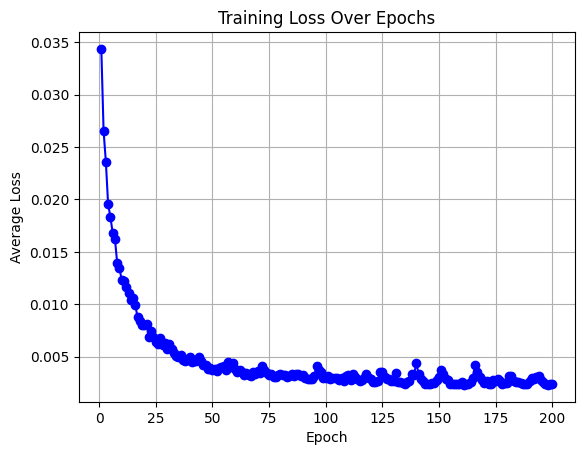

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1, num_epochs + 1), loss_history, marker='o', color='b')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss Over Epochs')
plt.grid()
plt.show()
plt.savefig("training_loss.png") 

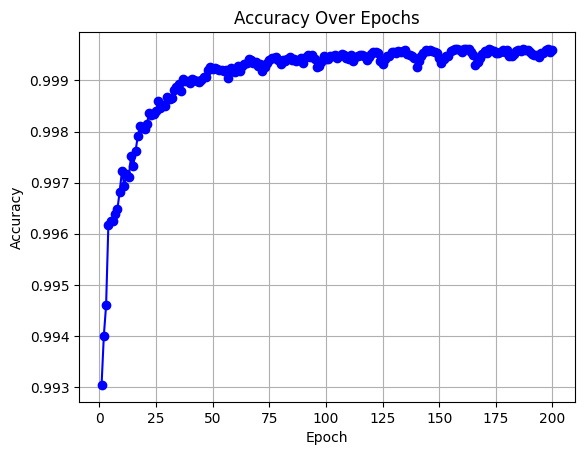

<Figure size 640x480 with 0 Axes>

In [11]:
plt.plot(range(1, num_epochs + 1), accuracy_history, marker='o', color='b')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.grid()
plt.show()
plt.savefig("Accuracy.png") 

In [12]:
torch.save(model.state_dict(), f'model_weights_{num_epochs}.pth')

In [13]:
# Load model
model = ILAgent(state_dim=427, action_dim=1680)
model.load_state_dict(torch.load(f'model_weights_{num_epochs}.pth'))
model.eval()

C:\Users\13054\AppData\Local\Temp\ipykernel_35356\2765242958.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'model_weights_{num_epochs

ILAgent(
  (fc1): Linear(in_features=427, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=2048, bias=True)
  (fc4): Linear(in_features=2048, out_features=1680, bias=True)
)

In [14]:
model.to(device)
predictions = model(features)
binary_predictions = (predictions >= 0).float()
correct = (binary_predictions == labels).float().sum()
accuracy = correct / labels.numel()
accuracy

tensor(0.9996, device='cuda:0')